In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
plt.rc('font', family='Malgun Gothic')

In [66]:
app = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [67]:
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [68]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [69]:
credit['STATUS'] = credit['STATUS'].map({'C':0, 'X':0, '0':1, '1':2, '2':3, '3':4, '4':5, '5':6})
credit_gb = credit.groupby('ID').sum()['STATUS']
credit_gb = credit_gb.apply(lambda x: 1 if x >= 24 else 0)
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [70]:
# credit['STATUS'] = credit['STATUS'].map({'C':0, 'X':0, '0':0, '1':0, '2':1, '3':1, '4':1, '5':1})

In [71]:
df = pd.merge(app, credit_gb, on='ID', how='inner')
df = df.set_index('ID')
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
ID,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0
5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1


In [72]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'] // 365)
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'].apply(lambda x: 0 if x == 365243 else x) // 365)

In [73]:
df.isnull().sum()
df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

# 그래프

c:\Users\PC\Bcode\myvenv\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\PC\Bcode\myvenv\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\PC\Bcode\myvenv\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\PC\Bcode\myvenv\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\PC\Bcode\myvenv\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\PC\Bcode\myvenv\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\PC\Bcode\myvenv\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: in

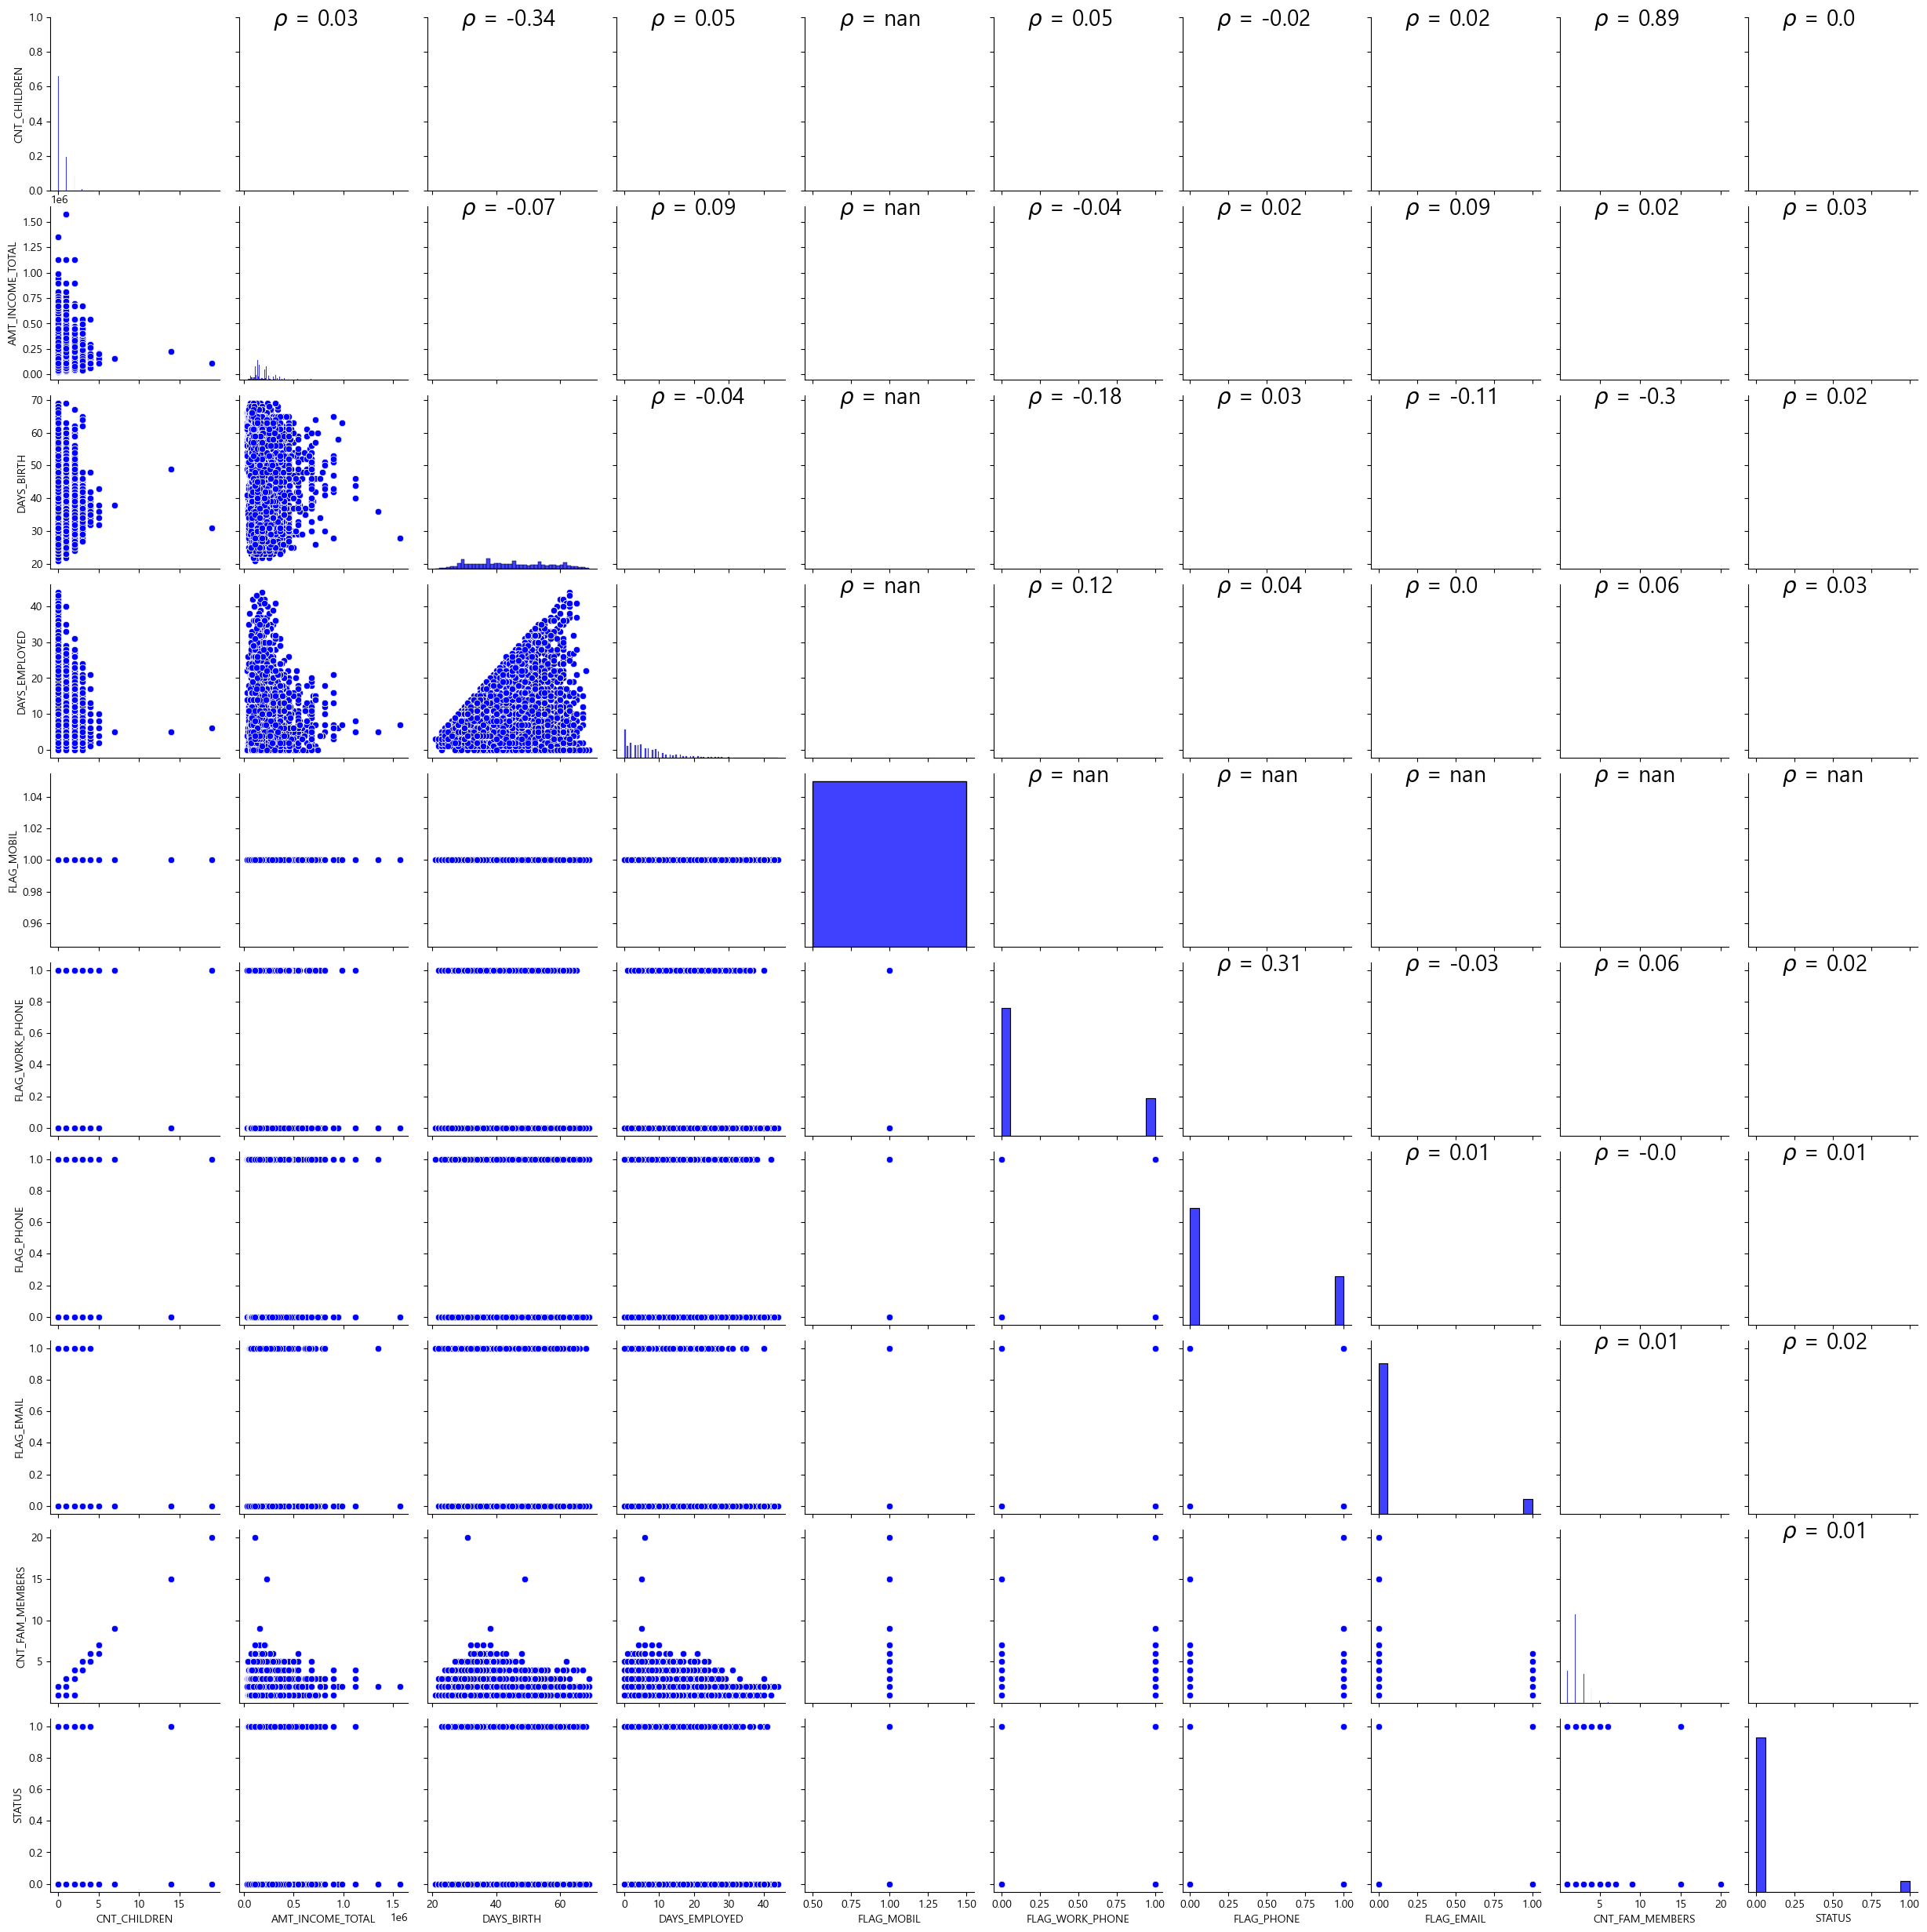

In [54]:
def corr(x, y, **kwargs):
    # 상관계수를 계산합니다.
    coef = np.corrcoef(x, y)[0][1]
    # 상관계수를 문자열로 바꿉니다.
    label = r'$\rho$ = ' + str(round(coef, 2))
    # 상관계수를 그래프 상단에 표시합니다.
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

# pairplot을 그립니다.
g = sns.PairGrid(df)

# 대각선 아래쪽에는 산점도를 그립니다.
g.map_lower(sns.scatterplot, color = 'blue')

# 대각선 위쪽에는 상관계수를 표시합니다.
g.map_upper(corr)

# 대각선에는 히스토그램을 그립니다.
g.map_diag(sns.histplot, color = 'blue')

plt.show()

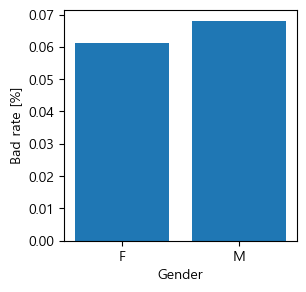

In [74]:
bygender = df.groupby('CODE_GENDER')['STATUS'].mean()

plt.figure(figsize=(3, 3))
plt.bar(bygender.index, height=bygender)
plt.xlabel('Gender')
plt.ylabel('Bad rate [%]')
plt.show()

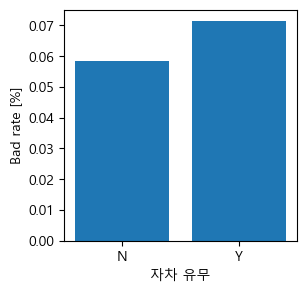

In [75]:
bygender = df.groupby('FLAG_OWN_CAR')['STATUS'].mean()

plt.figure(figsize=(3, 3))
plt.bar(bygender.index, height=bygender)
plt.xlabel('자차 유무')
plt.ylabel('Bad rate [%]')
plt.show()

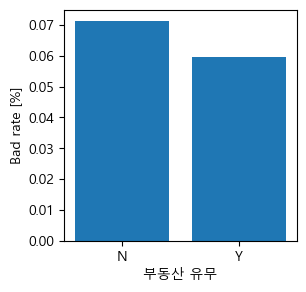

In [76]:
bygender = df.groupby('FLAG_OWN_REALTY')['STATUS'].mean()

plt.figure(figsize=(3, 3))
plt.bar(bygender.index, height=bygender)
plt.xlabel('부동산 유무')
plt.ylabel('Bad rate [%]')
plt.show()

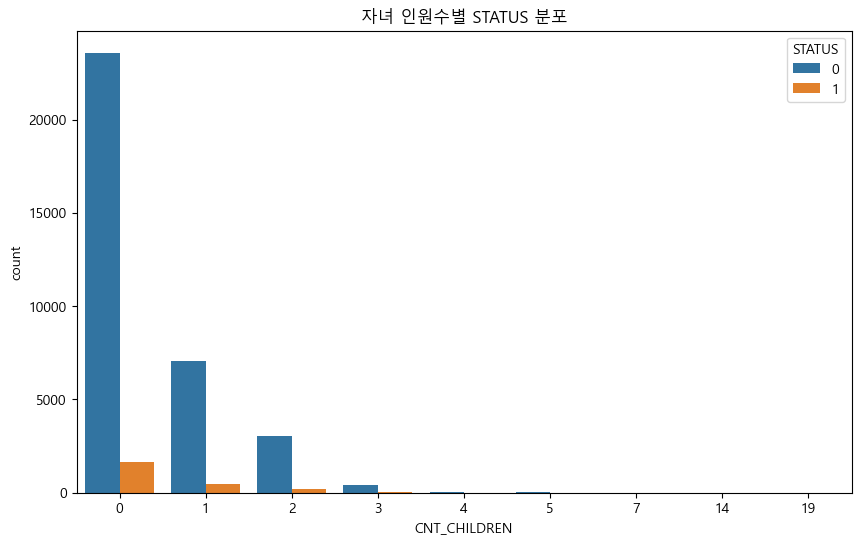

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(x='CNT_CHILDREN', hue='STATUS', data=df)
plt.title('자녀 인원수별 STATUS 분포')
plt.show()

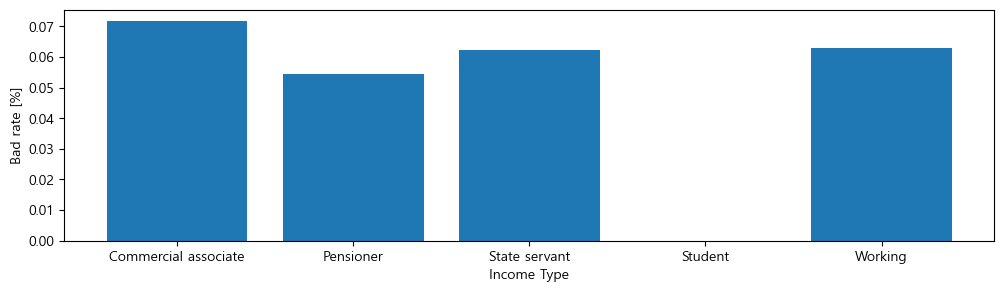

In [78]:

byincometype = df.groupby('NAME_INCOME_TYPE')['STATUS'].mean()

plt.figure(figsize=(12, 3))
plt.bar(byincometype.index, height=byincometype)
plt.xlabel('Income Type')
plt.ylabel('Bad rate [%]')
plt.show()

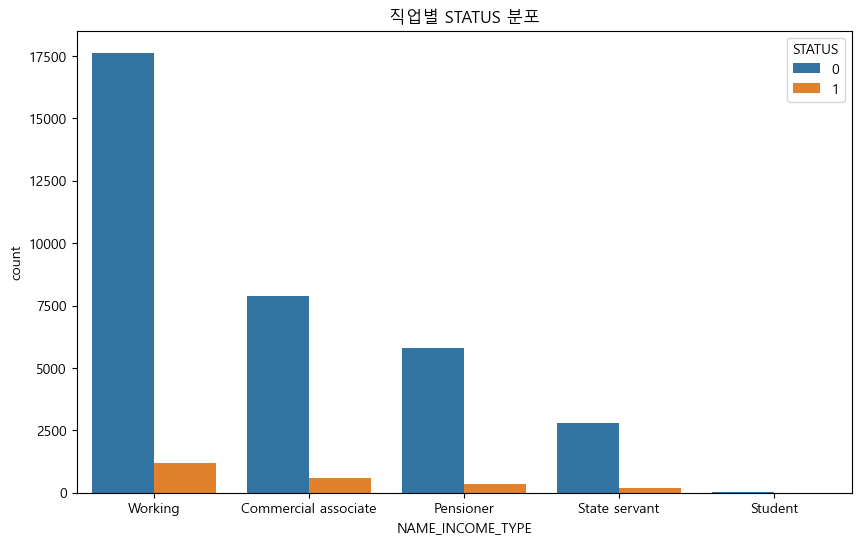

In [79]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_INCOME_TYPE', hue='STATUS', data=df)
plt.title('직업별 STATUS 분포')
plt.show()

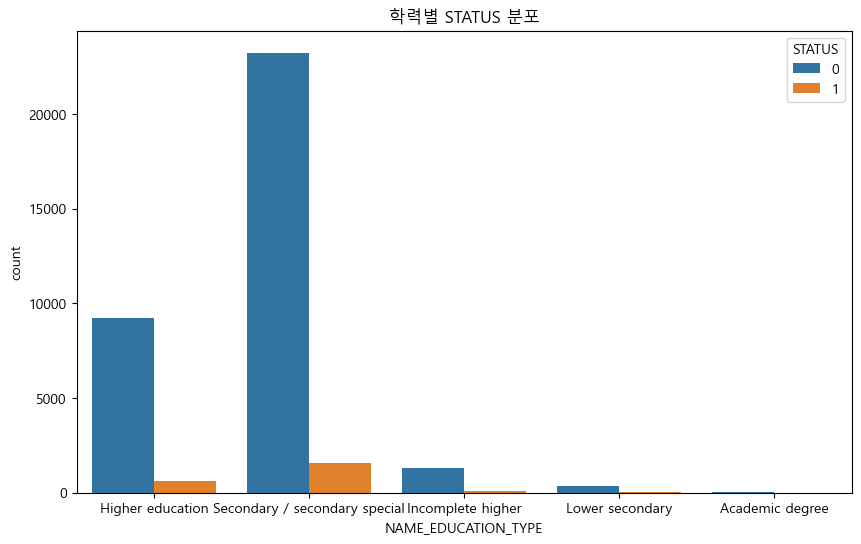

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='STATUS', data=df)
plt.title('학력별 STATUS 분포')
plt.show()

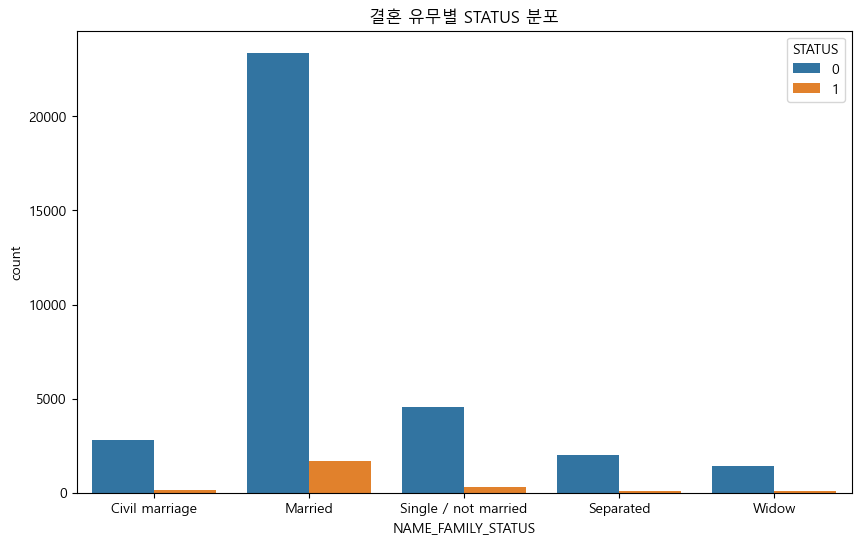

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_FAMILY_STATUS', hue='STATUS', data=df)
plt.title('결혼 유무별 STATUS 분포')
plt.show()

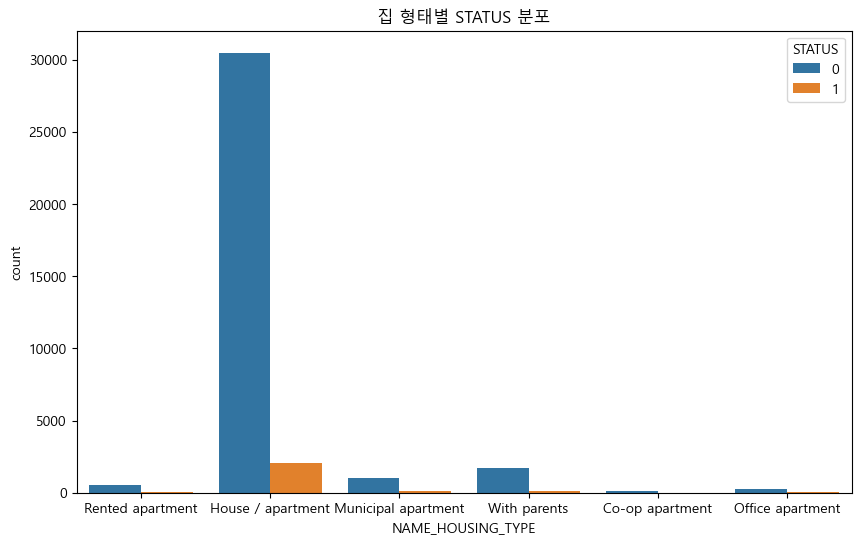

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_HOUSING_TYPE', hue='STATUS', data=df)
plt.title('집 형태별 STATUS 분포')
plt.show()

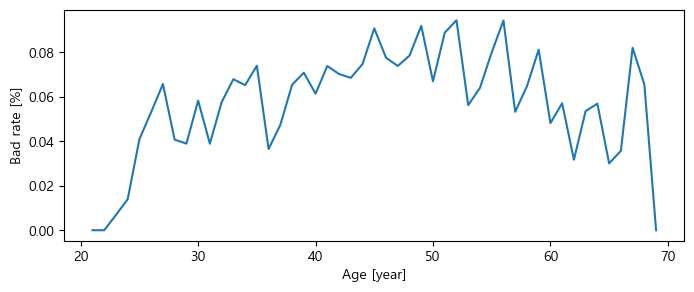

In [80]:
byage = df.groupby('DAYS_BIRTH')['STATUS'].mean()

plt.figure(figsize=(8, 3))
plt.plot(byage)
plt.xlabel('Age [year]')
plt.ylabel('Bad rate [%]')
plt.show()

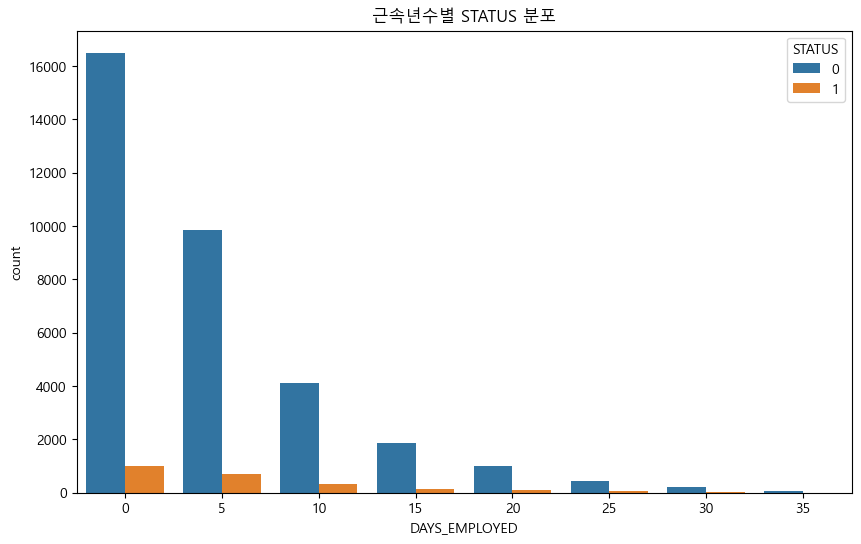

In [79]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
labels = [0, 5, 10, 15, 20, 25, 30, 35 ]
df['DAYS_EMPLOYED'] = pd.cut(df['DAYS_EMPLOYED'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.countplot(x='DAYS_EMPLOYED', hue='STATUS', data=df)
plt.title('근속년수별 STATUS 분포')
plt.show()

In [81]:
df_nb = df.copy()

In [82]:
df_nb['CODE_GENDER'] = df_nb['CODE_GENDER'].map({'M':0, 'F':1})
df_nb['FLAG_OWN_CAR'] = df_nb['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
df_nb['FLAG_OWN_REALTY'] = df_nb['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})

df_nb.loc[:, 'NAME_INCOME_TYPE'] = df_nb['NAME_INCOME_TYPE'].map({'Working':0, 'Commercial associate':1, 'Pensioner':2, 'State servant':3, 'Student':4})
df_nb.loc[:, 'NAME_EDUCATION_TYPE'] = df_nb['NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':0, 'Higher education':1, 'Incomplete higher':2,
                                 'Lower secondary':3, 'Academic degree':4})
df_nb.loc[:, 'NAME_HOUSING_TYPE'] = df_nb['NAME_HOUSING_TYPE'].map({'House / apartment':0, 'With parents':1, 'Municipal apartment':2, 
                              'Rented apartment':3, 'Office apartment':4, 'Co-op apartment':5})
df_nb

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
ID,,,,,,,,,,,,,,,,,
5008804,0,1,1,0,427500.0,0,1,Civil marriage,3,33,13,1,1,0,0,2.0,0
5008805,0,1,1,0,427500.0,0,1,Civil marriage,3,33,13,1,1,0,0,2.0,0
5008806,0,1,1,0,112500.0,0,0,Married,0,59,4,1,0,0,0,2.0,0
5008808,1,0,1,0,270000.0,1,0,Single / not married,0,53,9,1,0,1,1,1.0,0
5008809,1,0,1,0,270000.0,1,0,Single / not married,0,53,9,1,0,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,0,1,1,0,315000.0,0,0,Married,0,48,7,1,0,0,0,2.0,0
5149834,1,0,1,0,157500.0,1,1,Married,0,34,4,1,0,1,1,2.0,1
5149838,1,0,1,0,157500.0,2,1,Married,0,34,4,1,0,1,1,2.0,1


c:\Users\PC\Bcode\myvenv\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\PC\Bcode\myvenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


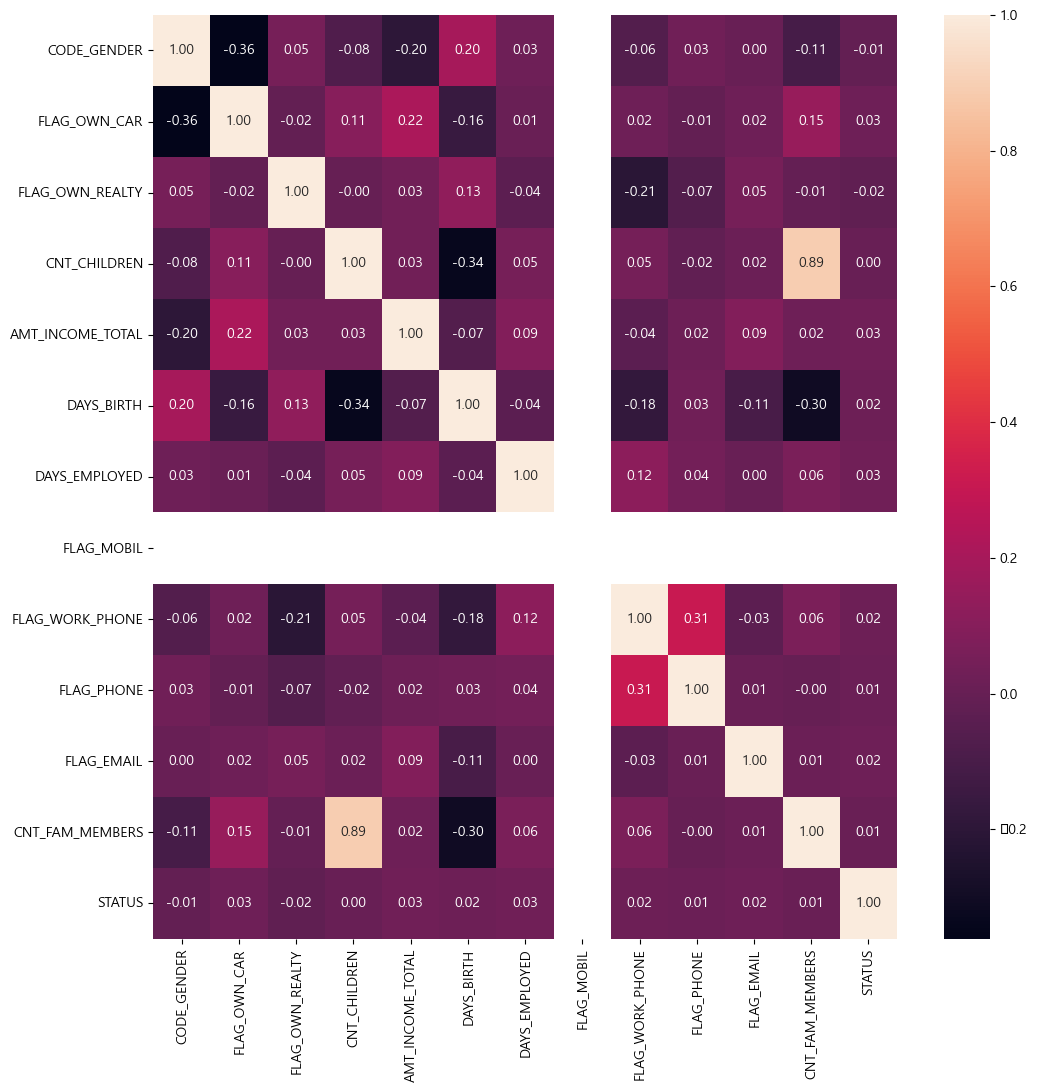

In [272]:
plt.figure(figsize=(12,12))
sns.heatmap(df_nb.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [83]:
X = df_nb.iloc[:,:-1]
y = df_nb.iloc[:,-1]

In [84]:
X.drop('DAYS_EMPLOYED', axis=1, inplace=True)

# split, 특성 선택

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=1)

In [276]:
from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier(criterion='gini', max_depth=4, n_estimators=25, random_state=1, n_jobs=-1)
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

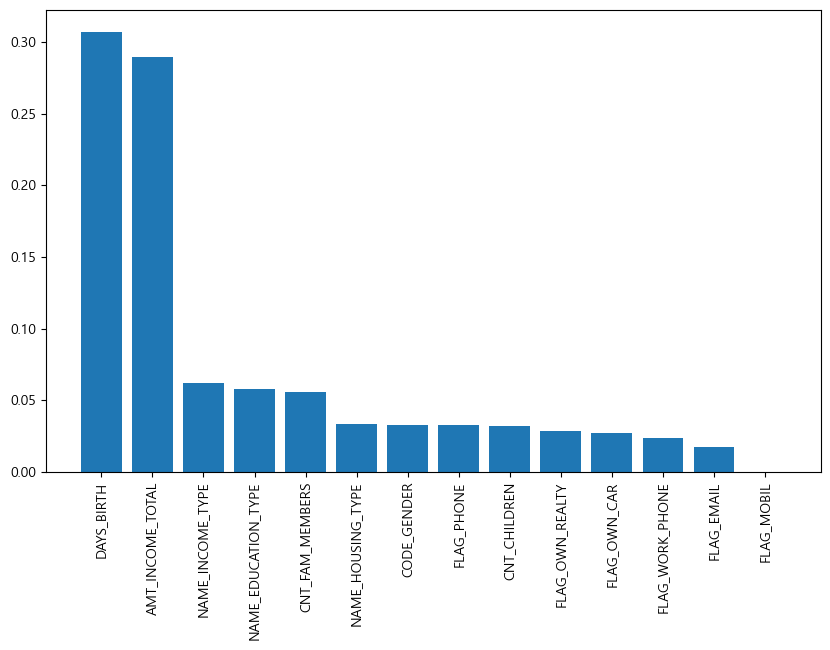

In [277]:
ipt = forest.feature_importances_
idxs = np.argsort(ipt)[::-1] # 역순

plt.figure(figsize=(10,6))
plt.bar(np.array(X_train.columns)[idxs], ipt[idxs]) # ipt[idxs 중요도
plt.xticks(rotation=90)
plt.show()

# 특성 선택

In [27]:

X_train = X_train[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CNT_FAM_MEMBERS']]
X_test = X_test[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CNT_FAM_MEMBERS']]


In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# 스케일링

In [29]:
# X_train 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
X_train_sc = std_scaler.fit_transform(X_train)
X_test_sc = std_scaler.fit_transform(X_test)

# 차원 축소

In [247]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lda = LDA(n_components=1)
# X_train_lda = lda.fit_transform(X_train_sc, y_train)

# # lda instance reference is used here
# X_test_lda = lda.transform(X_test_sc)

# plt.scatter(X_train_lda[y_train==0], np.zeros((np.sum(y_train==0),1)), color='red')
# plt.scatter(X_train_lda[y_train==1], np.zeros((np.sum(y_train==1),1)), color='blue')
# plt.show()


In [246]:
# from sklearn.decomposition import KernelPCA, PCA

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_train_sc)

# plt.figure(figsize=(10,1))
# plt.scatter(X_pca[y_train==0,0], np.zeros_like(X_pca[y_train==0,0])) # np.zeros(X_pca[y==0,0].shape)
# plt.scatter(X_pca[y_train==1,0], np.zeros_like(X_pca[y_train==1,0]))
# plt.show()

c:\Users\PC\Bcode\myvenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


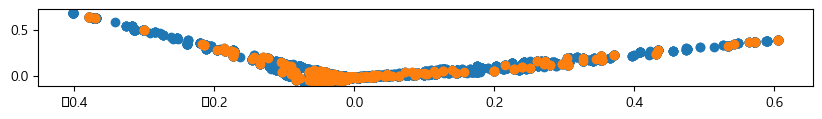

In [281]:
from sklearn.decomposition import KernelPCA

# 먼저 훈련 데이터에 대해서 fit_transform을 수행합니다.
pca = KernelPCA(n_components=2, kernel='rbf', gamma=30)
X_train_kpca = pca.fit_transform(X_train_sc)

# 그 후, 테스트 데이터에 대해서는 transform만 수행합니다.
X_test_kpca = pca.transform(X_test_sc)

# 그래프 그리기
plt.figure(figsize=(10,1))
plt.scatter(X_train_kpca[y_train==0,0], X_train_kpca[y_train==0,1]) 
plt.scatter(X_train_kpca[y_train==1,0], X_train_kpca[y_train==1,1])
plt.show()


In [43]:
y_test.value_counts()

STATUS
0    6829
1     463
Name: count, dtype: int64

In [282]:
X_train_kpca.shape

(29165, 2)

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

lr = LogisticRegression()
ada = AdaBoostClassifier(base_estimator=lr, n_estimators=100, learning_rate=0.1)

ada.fit(X_train_sc, y_train)
p_test = ada.predict(X_test_sc)
f1_score(y_test, p_test)

c:\Users\PC\Bcode\myvenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.0

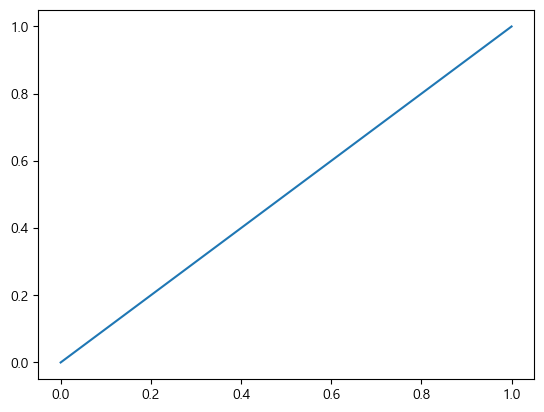

In [31]:
fpr, tpr, thres = roc_curve(y_test, p_test)
roc_auc_score(y_test, p_test)
plt.figure()
plt.plot(fpr, tpr)
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_test_sc[:,[0,1]], y_test)

DecisionTreeClassifier(max_depth=2)

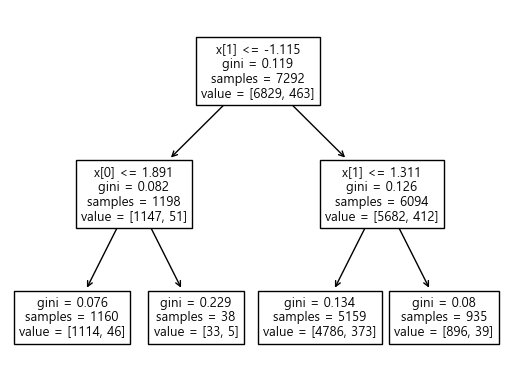

In [37]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_5156\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_5156\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


c:\Users\PC\Bcode\myvenv\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\PC\Bcode\myvenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


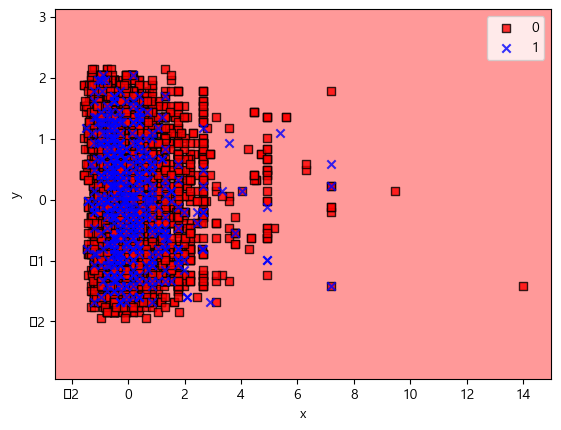

In [38]:
plot_decision_regions(X_test_sc, y_test, tree)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [41]:
from sklearn.svm import SVC

# gamma를 적게 하면 과대적합을 방지 가능
# C를 적게하면 과소적합, 크게하면 과대적합
svc = SVC(kernel='rbf', C=1, random_state=1, gamma=1)
svc.fit(X_test_sc[:,[0,1]], y_test)

SVC(C=1, gamma=1, random_state=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_5156\2919206103.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_5156\2919206103.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
c:\Users\PC\Bcode\myvenv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


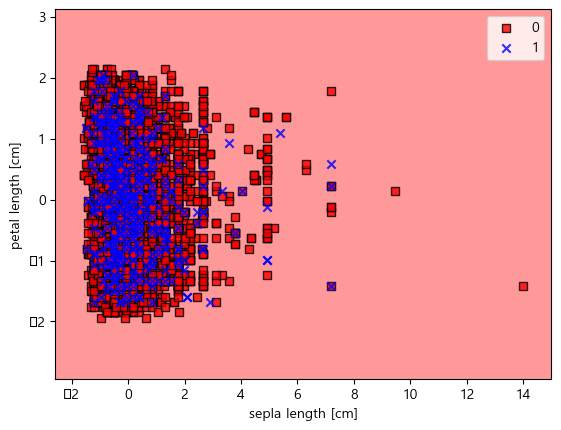

In [42]:
plot_decision_regions(X_test_sc, y_test, svc)
plt.xlabel('sepla length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()
plt.show()

# 교차검증

In [291]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA

# 순서대로
lr_pipe = make_pipeline( 
                        
                        SVC(kernel='rbf', C=1, random_state=1, gamma=1))
# lr_pipe.fit(X_train, y_train)
# lr_pipe.predict(X_test)
cvscore = cross_val_score(estimator=lr_pipe, X=X_train_kpca, y=y_train, cv=10, n_jobs=-1) # 10조각(kfold)
print('\n교자검증(CV) 정확도 : ', np.mean(cvscore))
for i, j in enumerate(cvscore):
    print(f'{i+1}번 : {j}')


교자검증(CV) 정확도 :  0.9364992384174318
1번 : 0.9365786767226603
2번 : 0.9365786767226603
3번 : 0.9365786767226603
4번 : 0.936235858758999
5번 : 0.936235858758999
6번 : 0.936556927297668
7번 : 0.936556927297668
8번 : 0.936556927297668
9번 : 0.936556927297668
10번 : 0.936556927297668


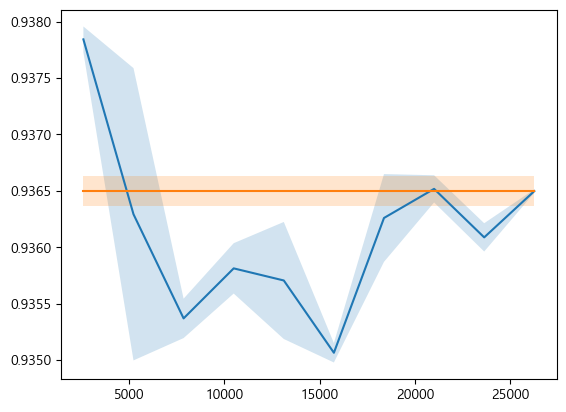

In [292]:
from sklearn.model_selection import learning_curve

sizes, train_score, val_score = learning_curve(estimator=lr_pipe, X=X_train_kpca, y=y_train, 
                                               train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)
train_std = np.std(train_score, axis=1)
val_std = np.std(val_score, axis=1)

plt.figure()
plt.plot(sizes, train_mean)
plt.fill_between(sizes, train_mean+train_std, train_mean-train_std, alpha=0.2)

plt.plot(sizes, val_mean)
plt.fill_between(sizes, val_mean+val_std, val_mean-val_std, alpha=0.2)

plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

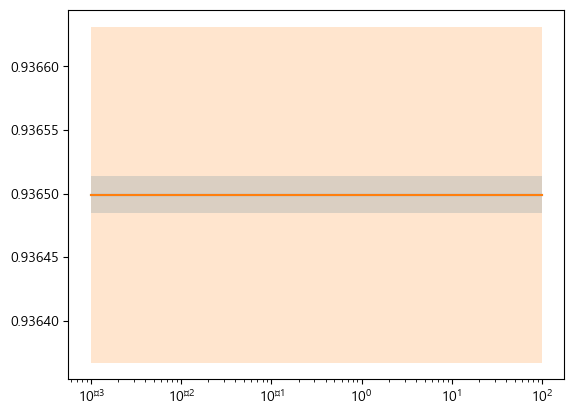

In [293]:
from sklearn.model_selection import validation_curve

# SVC(kernel='rbf', C=1, random_state=1, gamma=1)

C_range = np.logspace(-3, 2, 6)
lr_pipe = make_pipeline(
                        
                        SVC(kernel='rbf', C=1, random_state=1, gamma=1))

train_score, val_score = validation_curve(estimator=lr_pipe, X=X_train_kpca, y=y_train, 
                                        param_name='svc__C', param_range=C_range, 
                                        cv=10, n_jobs=-1)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)
train_std = np.std(train_score, axis=1)
val_std = np.std(val_score, axis=1)

plt.figure()
plt.plot(C_range, train_mean)
plt.fill_between(C_range, train_mean+train_std, train_mean-train_std, alpha=0.2)

plt.plot(C_range, val_mean)
plt.fill_between(C_range, val_mean+val_std, val_mean-val_std, alpha=0.2)

plt.xscale('log')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_pipe = make_pipeline(StandardScaler(), SVC(random_state=1))
C_range = np.logspace(-4, 3, 8)
gamma_range = np.logspace(-4, 3, 8)
param_grid = [{'svc__C':C_range, 
               'svc__kernel':['linear']},
              {'svc__C':C_range, 
              'svc__gamma':gamma_range, 
              'svc__kernel':['rbf']}]

# 학습기만 생성됨
gs = GridSearchCV(estimator=svc_pipe, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)